#Regression Techniques

In this code example we'll use a "toy" dataset from the scikit learn library to demonstrate regression.

## 1. Load The Dataset
We're going to use the boston dataset that contains data on houses (tax, price etc).*italicized text*

For many toy datasets, we can call the `keys()` function to know what it contains.

In [1]:
from sklearn.datasets import load_boston # Import the boston data set from sklearn
boston_dataset = load_boston()           # Load the boston dataset into memory
print(boston_dataset.keys())             # Print the dataset object's parameters

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


Now that we know this data set has a DESCR element (a description), we can use that to extract what we want from it.

In [2]:
print(boston_dataset.DESCR) # Print the object's description

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

## 1.1. Preparing The Data.
Sometimes we need to display the data in an easy to view manner, so we use the pandas library to put the data onto an object called a dataframe.

That data frame will then be used to hold our data during training.

In [3]:
import pandas as pd # Import the pandas library
"""
Create a datafram object.
Each row represents on data point.
The second argument let's us access the columns by their name rather than index.
"""
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()       # Prints the first 5 rows of the data frame.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


We will append our target to that dataframe for convenience later.

In [4]:
boston['MEDV'] = boston_dataset.target # Added the targets as an extra column in the dataframe.
boston.head()                          # Prints the first 5 rows of the data frame.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## 1.2. Visualizing The Data.
This data has 13 different features which makes it very difficult to visualize, but we can instead choose one of the values to plot on wither axis and have a guess as to what the trend may look like.

For this dataset we'll just chosse the "RM" feature (number of rooms).

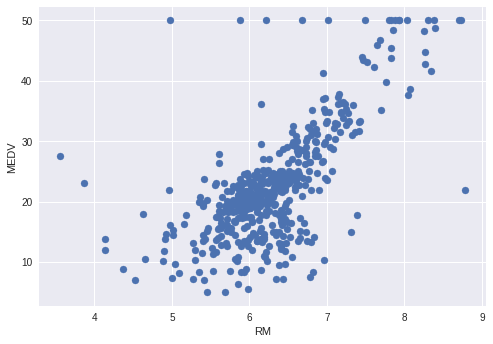

In [5]:
import matplotlib.pyplot as plt           # Import the matplotlib graphing library
plt.scatter(boston['RM'], boston['MEDV']) # Draw a scatter plot with "RM" the x-axis and and "MEDV" on the y-axis. 
plt.ylabel('MEDV')                        # Label the y-axis
plt.xlabel('RM')                          # Label the x-axis
plt.show()                                # Show the graph

## 2. Creating The Linear Model And Training It To Fit The Data

In [6]:
from sklearn.linear_model import LinearRegression # Import the linear regression model from sklearn
X = boston[['RM']]                                # Inputs as a 2D array
Y = boston['MEDV']                                # Targets (labels) as a 1D array
model = LinearRegression()                        # Model
model.fit(X,Y)                                    # Fit the model with the data

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## 2.1. Visualizing the Best Fit Line

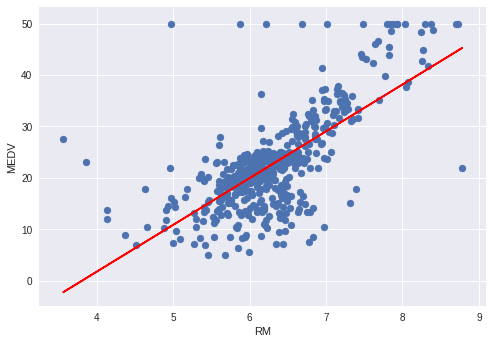

In [7]:
y_pred = model.predict(X) # Get the model's predictions
plt.plot(boston['RM'], y_pred, 'r') # Plot a line of the model's predictions
plt.scatter(boston['RM'], boston['MEDV']) # Draw a scatter plot with "RM" the x-axis and and "MEDV" on the y-axis. 
plt.ylabel('MEDV') # Label the y-axis
plt.xlabel('RM') # Label the x-axis
plt.show() # Show the graph